In [110]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
os.makedirs("plots", exist_ok=True)
data = pd.read_csv("vacancies.csv")

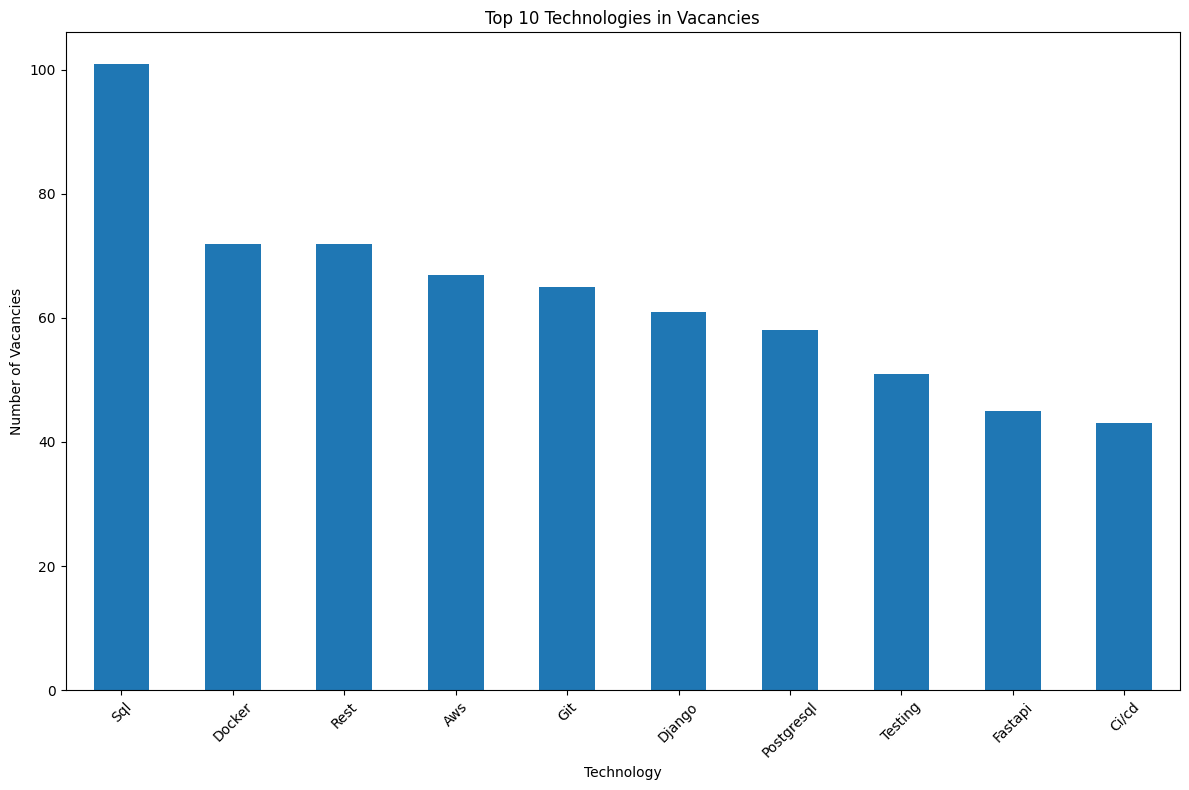

In [106]:
technologies = data["technologies"].dropna().str.split(",").explode().value_counts()
technologies.index = technologies.index.str.capitalize()

plt.figure(figsize=(12, 8))

technologies.head(10).plot(kind="bar")

plt.title("Top 10 Technologies in Vacancies")
plt.xlabel("Technology")
plt.ylabel("Number of Vacancies")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("plots/top_technologies_overall.png", dpi=300)

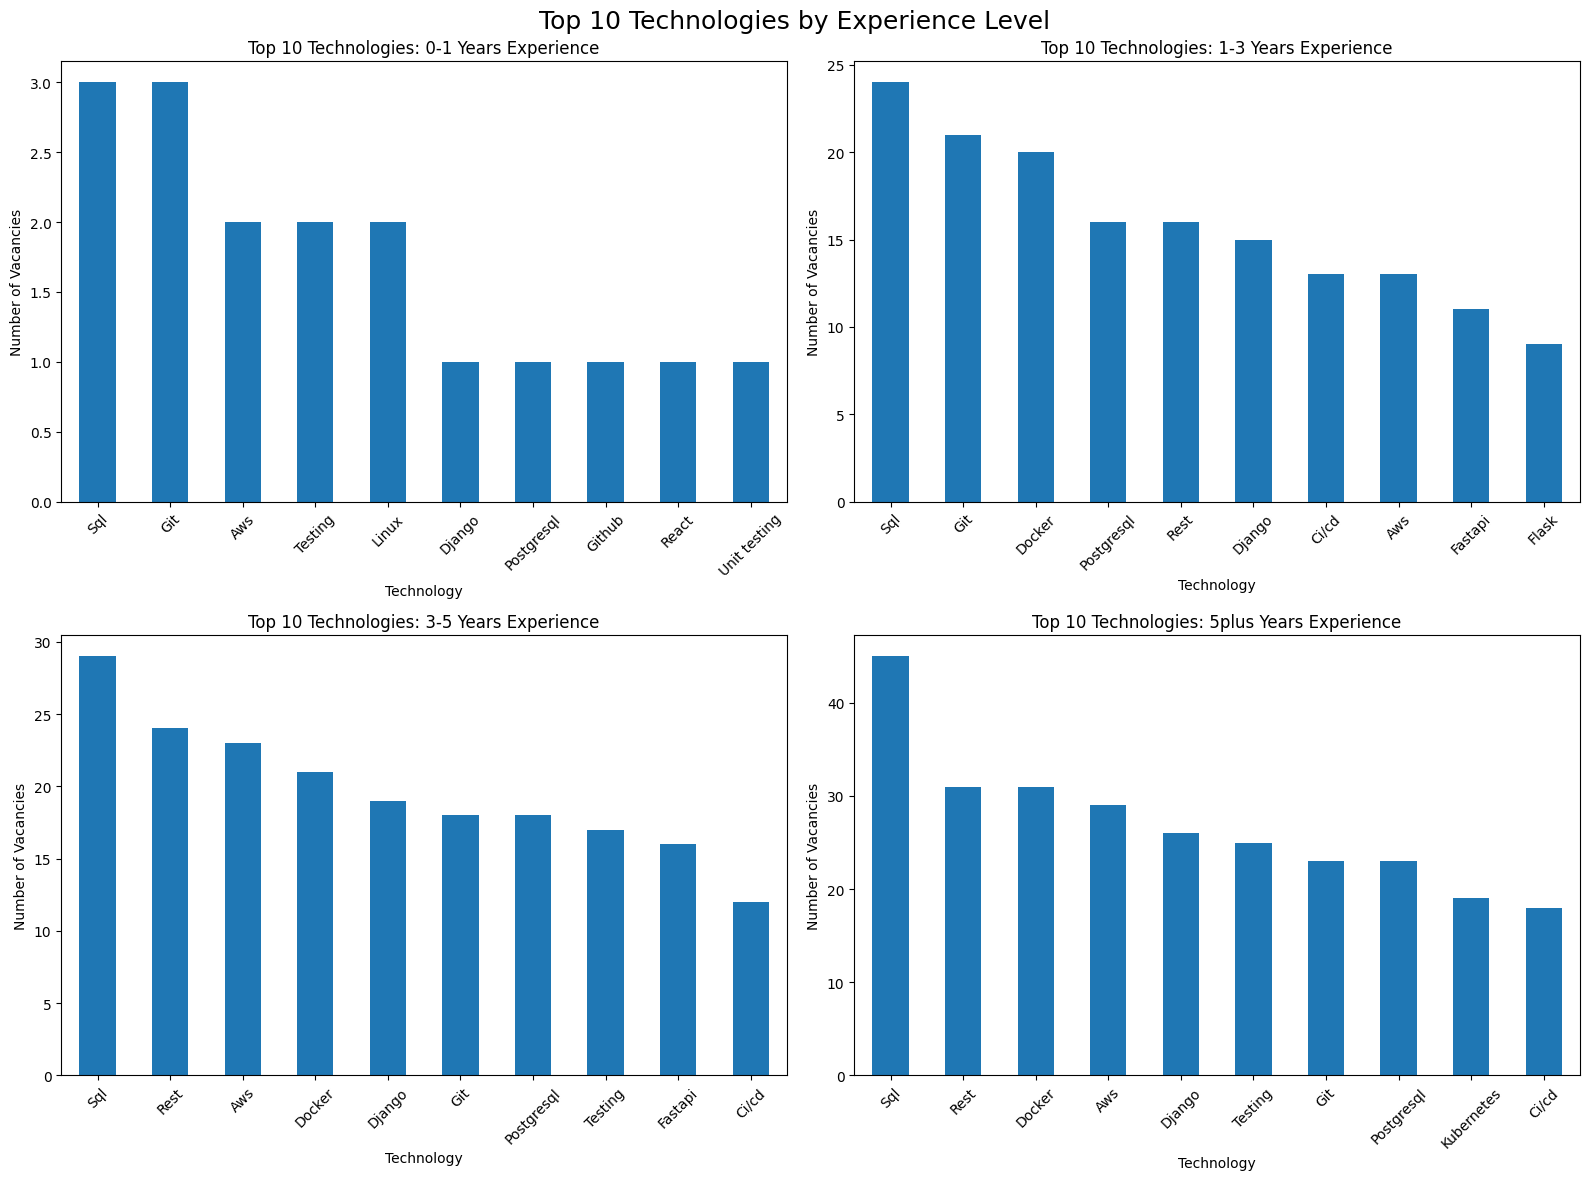

In [107]:
experience_levels = ["0-1", "1-3", "3-5", "5plus"]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for ax, exp_level in zip(axes.flatten(), experience_levels):
    filtered_data = data[data["experience"] == exp_level]
    technologies = (
        filtered_data["technologies"]
        .dropna()
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts()
        .head(10)
    )
    technologies.index = technologies.index.str.capitalize()
    
    technologies.plot(kind="bar", ax=ax)
    ax.set_title(f"Top 10 Technologies: {exp_level} Years Experience")
    ax.set_xlabel("Technology")
    ax.set_ylabel("Number of Vacancies")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.suptitle("Top 10 Technologies by Experience Level", fontsize=18)
plt.tight_layout()

plt.savefig("plots/top_technologies_all_experience_levels.png", dpi=300)

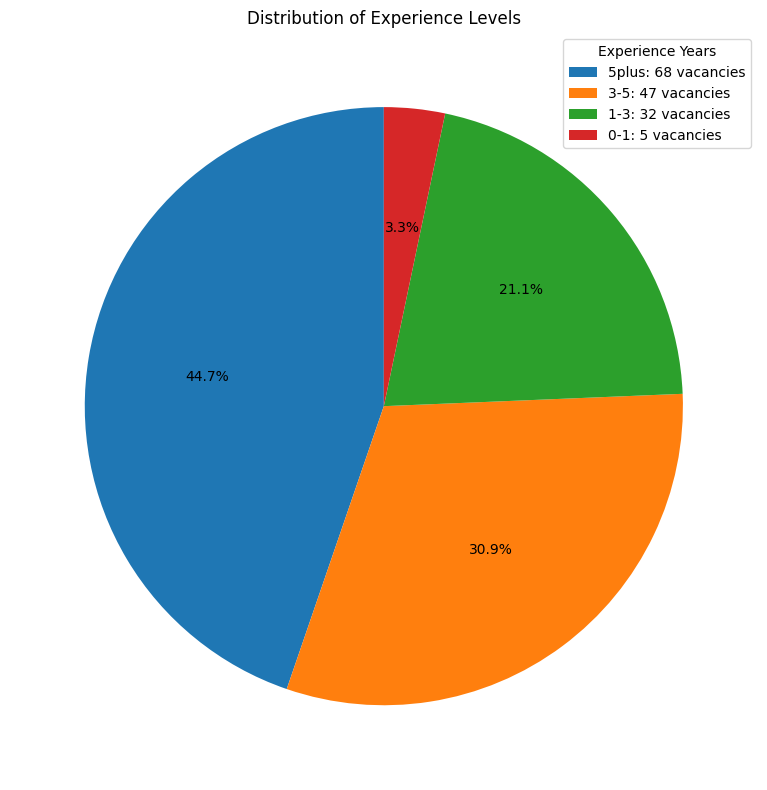

In [108]:
experience_counts = data["experience"].value_counts()

plt.figure(figsize=(12, 8))

patches, texts, autotexts = plt.pie(
    experience_counts,
    autopct="%1.1f%%",
    startangle=90
)

labels_with_counts = [f"{label}: {count} vacancies" for label, count in zip(
    experience_counts.index, experience_counts)
]
plt.legend(patches, labels_with_counts, title="Experience Years", loc="best")

plt.title("Distribution of Experience Levels")
plt.tight_layout()

plt.savefig("plots/experience_distribution.png", dpi=300)

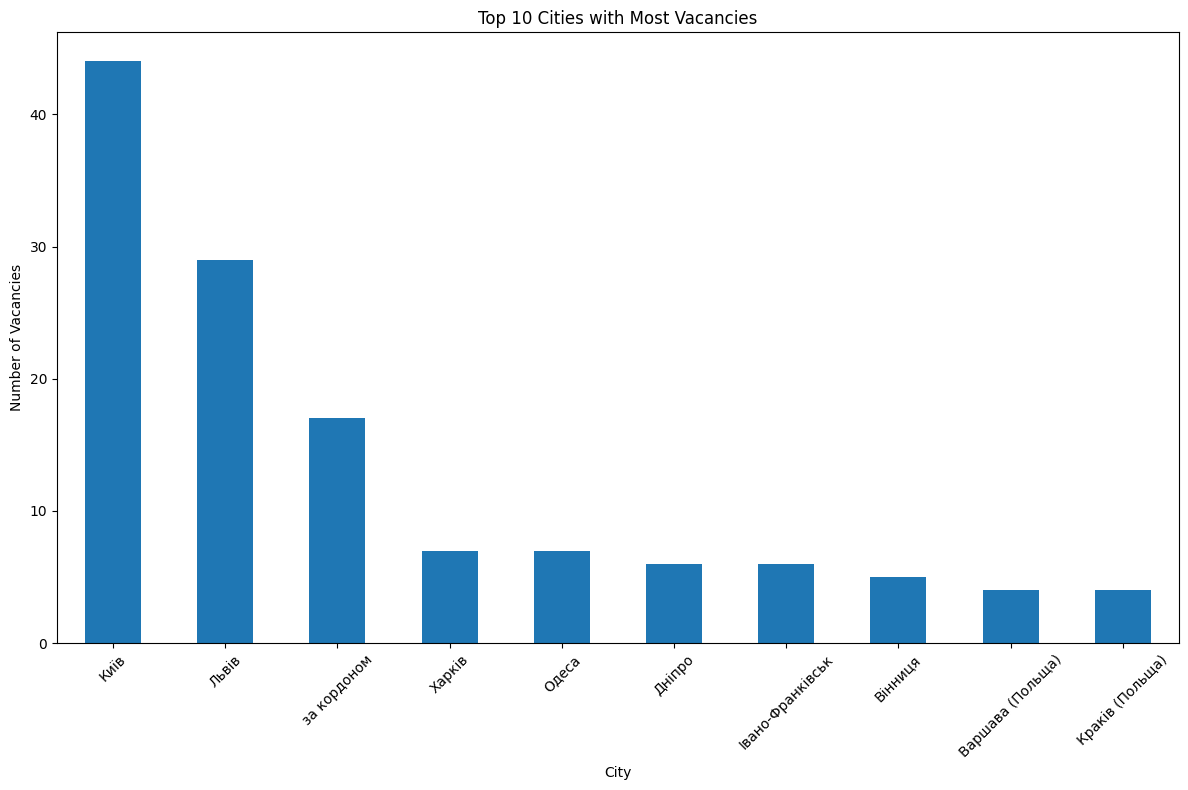

In [109]:
cities = (
    data["location"]
    .dropna()
    .str.split(",|;")
    .explode()
    .str.strip()
    .value_counts()
)
cities = cities[~cities.index.str.contains("віддалено", case=False)]
cities.head(10)

plt.figure(figsize=(12, 8))

cities.head(10).plot(kind="bar")

plt.title("Top 10 Cities with Most Vacancies")
plt.xlabel("City")
plt.ylabel("Number of Vacancies")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("plots/top_10_cities_vacancies.png", dpi=300)